<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/boston_my_process_20210310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data=load_boston()

In [3]:
X_df=pd.DataFrame(data=data.data,columns=data.feature_names)
y_df=pd.DataFrame(data=data.target,columns=['MEDV'])

df=pd.concat([X_df,y_df],axis=1)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




        CRIM per capita crime rate by town
        人口1人あたりの犯罪の発生率

        ZN proportion of residential land zoned for lots over 25,000 sq.ft.
        25,000 平方フィート以上の住居区画の占める割合

        INDUS proportion of non-retail business acres per town
        小売業以外の商業が占める面積の割合

        CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        チャールズ川によるダミー変数(1: 川の周辺, 0: それ以外)

        NOX nitric oxides concentration (parts per 10 million)
        窒素酸化物の濃度

        RM average number of rooms per dwelling
        住居の平均部屋数

        AGE proportion of owner-occupied units built prior to 1940
        1940 年より前に建てられた物件の割合

        DIS weighted distances to five Boston employment centres
        5つのボストン市の雇用施設からの距離

        RAD index of accessibility to radial highways
        環状高速道路へのアクセスしやすさの指数

        TAX full-value property-tax rate per $10,000
        $10,000 ドルあたりの固定資産税率の総計

        PTRATIO pupil-teacher ratio by town
        町毎の児童と教師の比率

        B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2

        LSTAT % lower status of the population
        給与の低い職業に従事する人口の割合 (%)

        MEDV Median value of owner-occupied homes in $1000’s
        所有者が占有している家屋の$ 1000単位の中央値




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


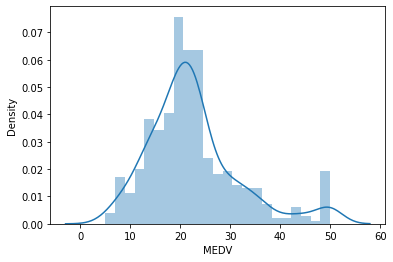

In [6]:
sns.distplot(df['MEDV'])

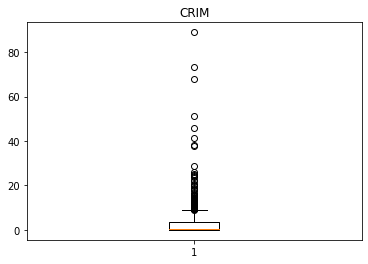

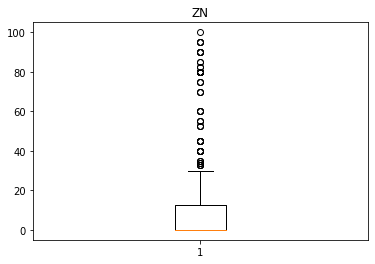

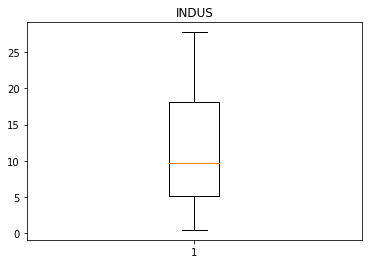

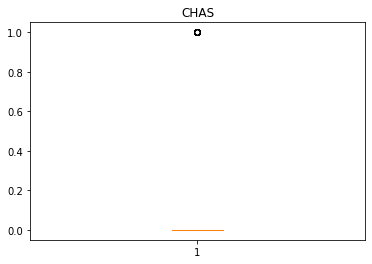

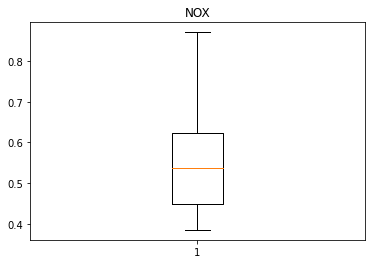

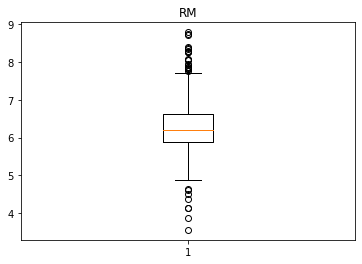

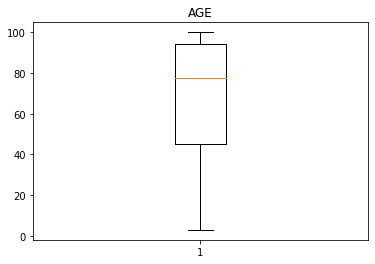

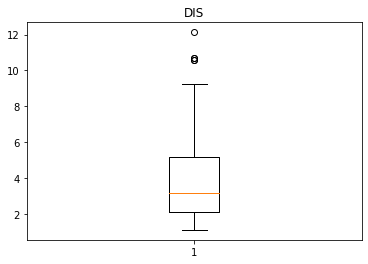

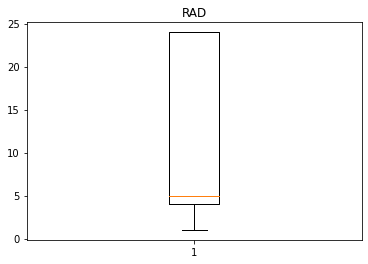

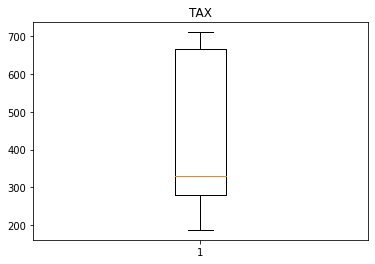

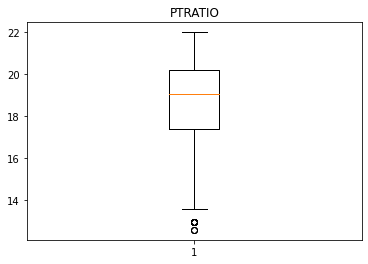

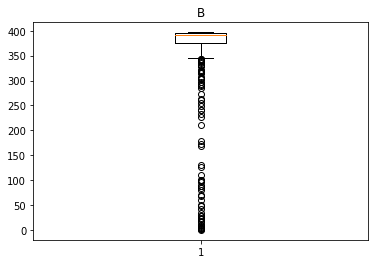

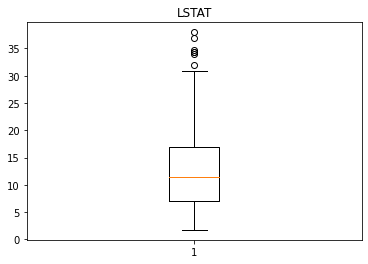

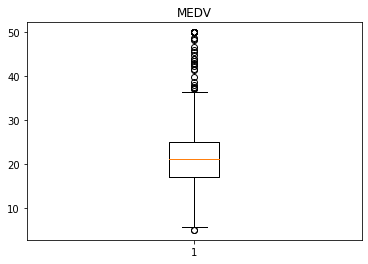

In [7]:
for col in df._get_numeric_data():
  fig=plt.figure()
  plt.boxplot(df[col])
  plt.title(col)

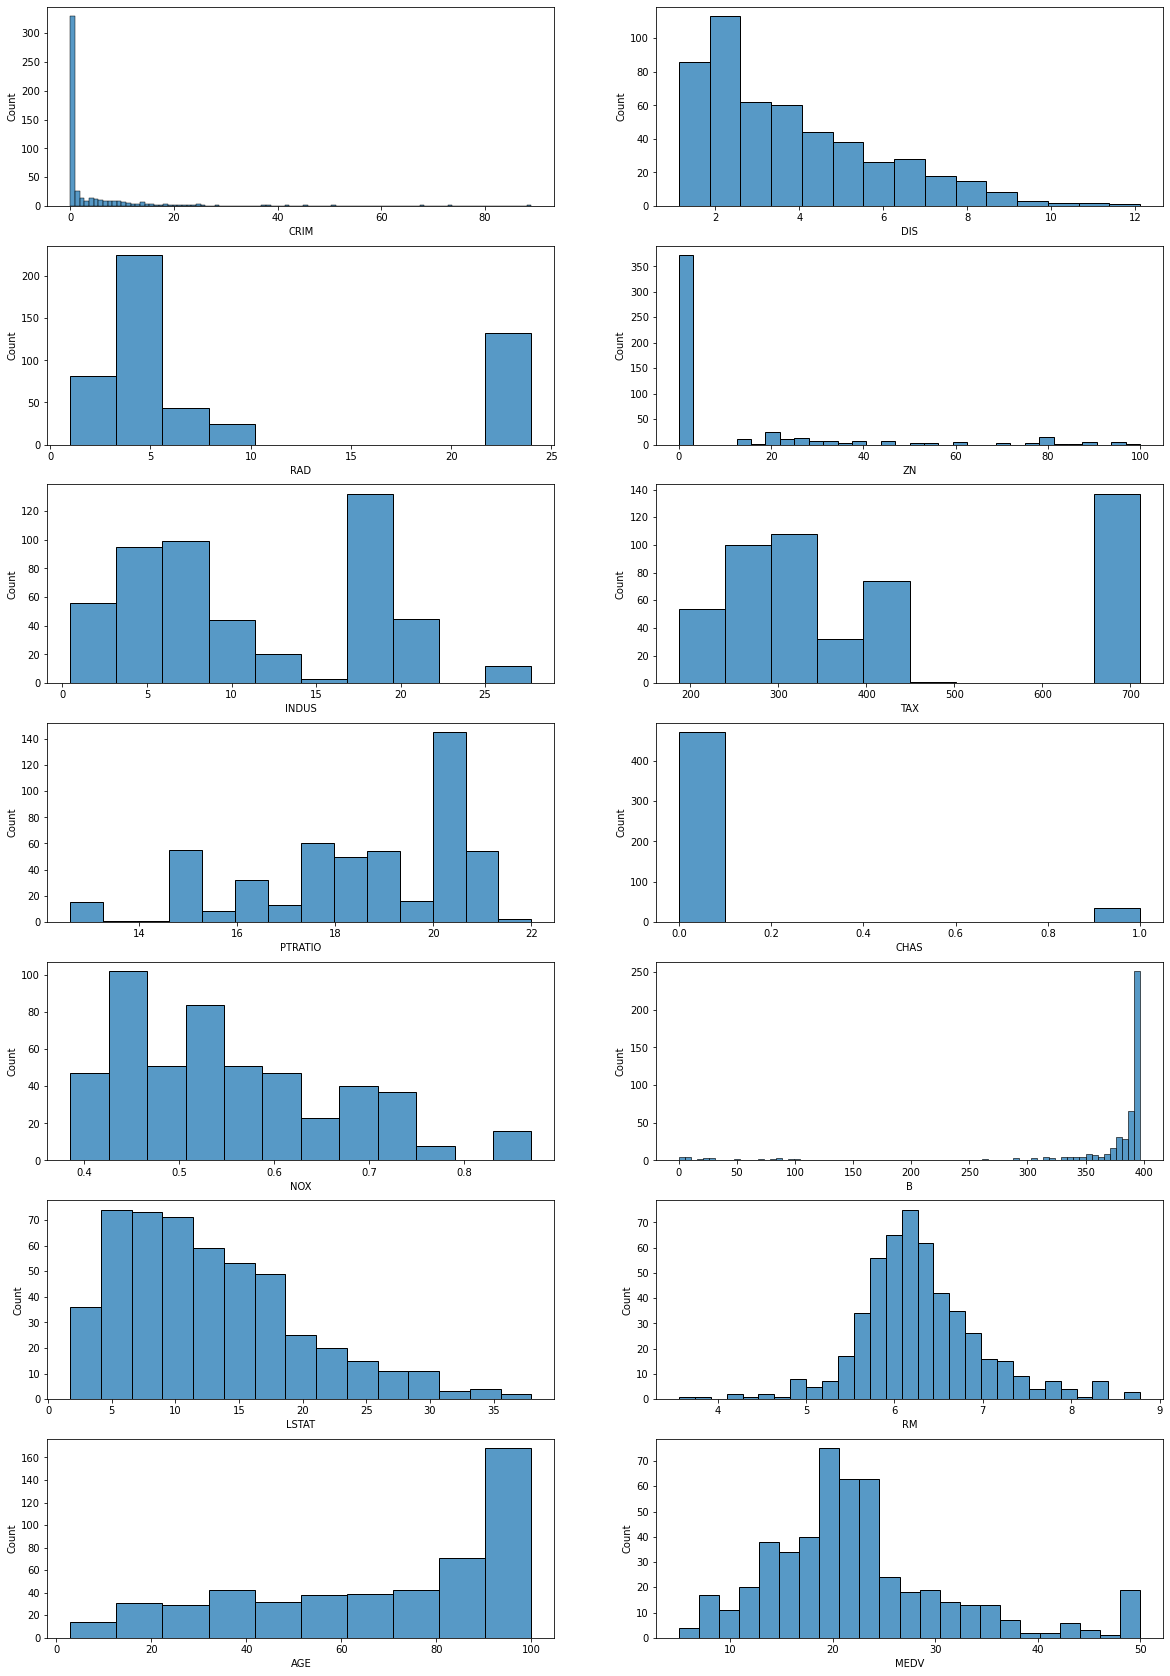

In [8]:
fig,axs=plt.subplots(nrows=7,ncols=2,figsize=(20,30))

for i,feature in enumerate(df.columns):
  sns.histplot(x=df[feature],ax=axs[i%7][i%2])

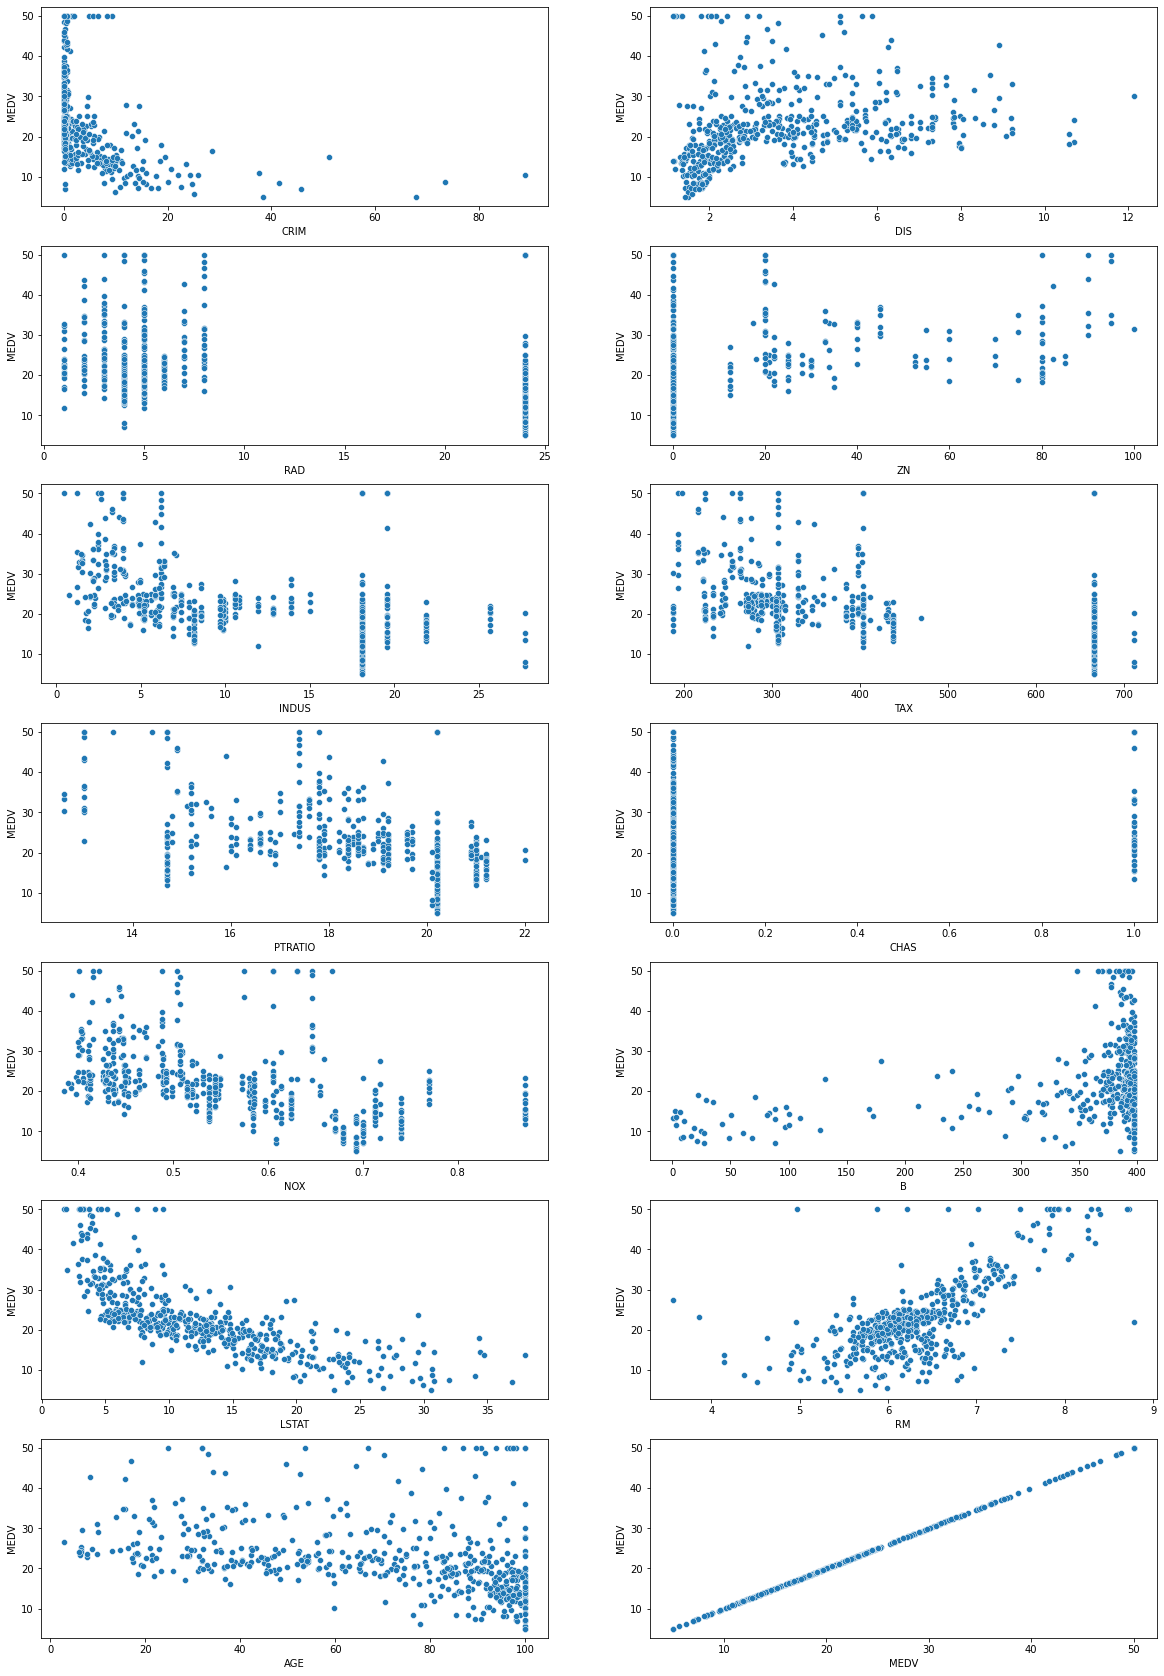

In [9]:
fig,axs=plt.subplots(nrows=7,ncols=2,figsize=(20,30))

for i,feature in enumerate(df.columns):
  sns.scatterplot(x=df[feature],y=df['MEDV'],ax=axs[i%7][i%2])

In [10]:
df_corr=df.corr().unstack().sort_values(kind='quicksort',ascending=False).reset_index()
df_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Coefficient'},inplace=1)

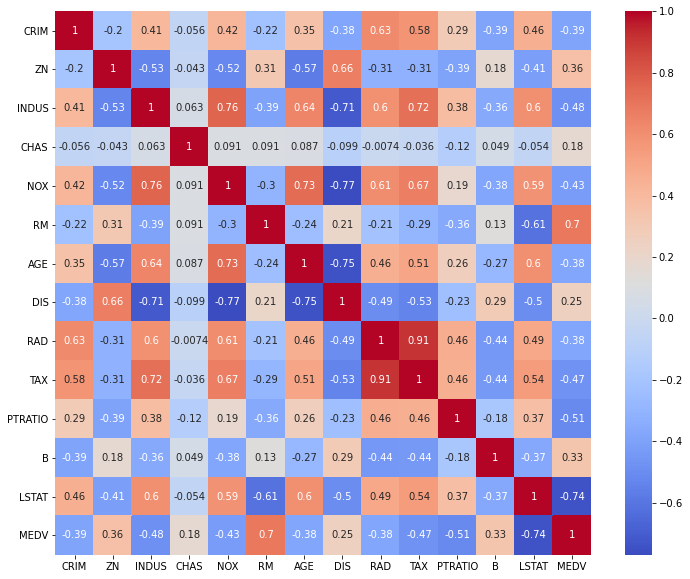

In [11]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

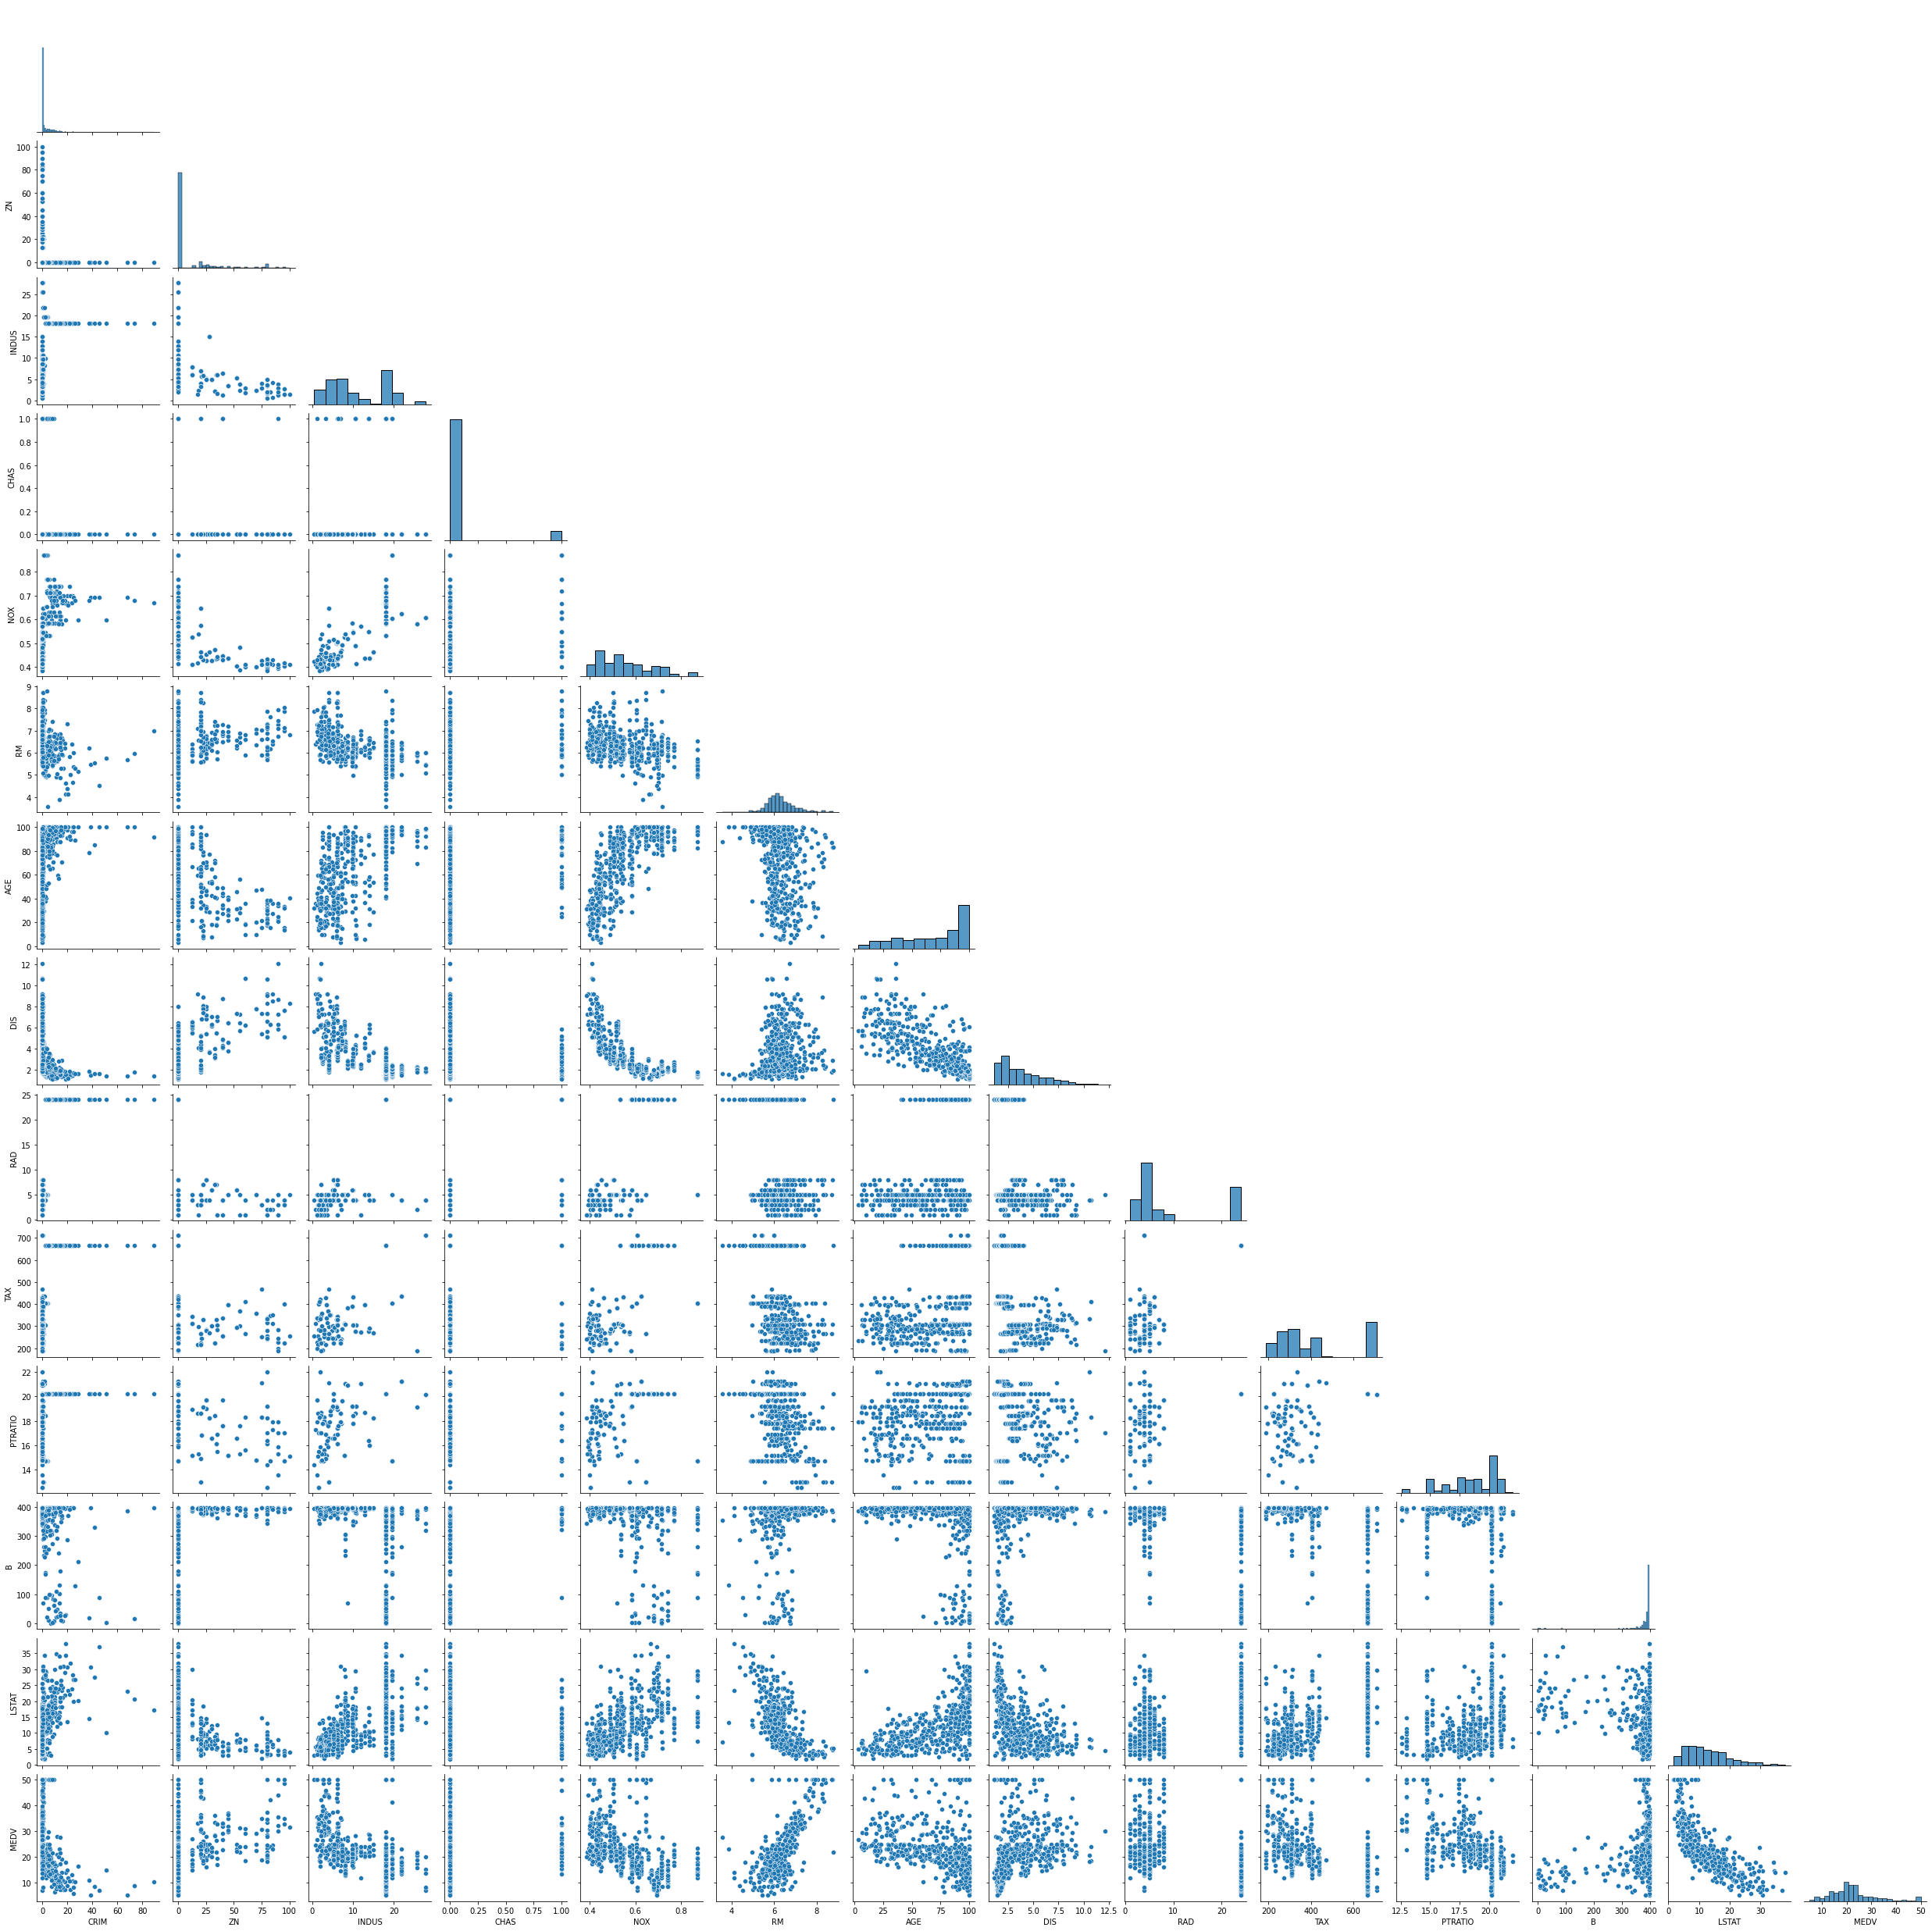

In [12]:
sns.pairplot(df,corner=1)

In [13]:
log_df=pd.DataFrame([])

log_df['log_MEDV']=np.log(df['MEDV']+1)
print('MEDV skewness:',df['MEDV'].skew())
print('log MEDV skewness:',log_df['log_MEDV'].skew())

log_df['log_LSTAT']=np.log(df['LSTAT']+1)
print('LSTAT skewness:',df['LSTAT'].skew())
print('log LSTAT skewness:',log_df['log_LSTAT'].skew())

log_df['log_RM']=np.log(df['RM']+1)
print('RM skewness:',df['RM'].skew())
print('log RM skewness:',log_df['log_RM'].skew())

log_df['log_DIS']=np.log(df['DIS']+1)
print('DIS skewness:',df['DIS'].skew())
print('log DIS skewness:',log_df['log_DIS'].skew())

MEDV skewness: 1.1080984082549072
log MEDV skewness: -0.2412435236076337
LSTAT skewness: 0.9064600935915367
log LSTAT skewness: -0.18719503273600827
RM skewness: 0.40361213328874385
log RM skewness: -0.18292946480472475
DIS skewness: 1.0117805793009007
log DIS skewness: 0.33156144277059646


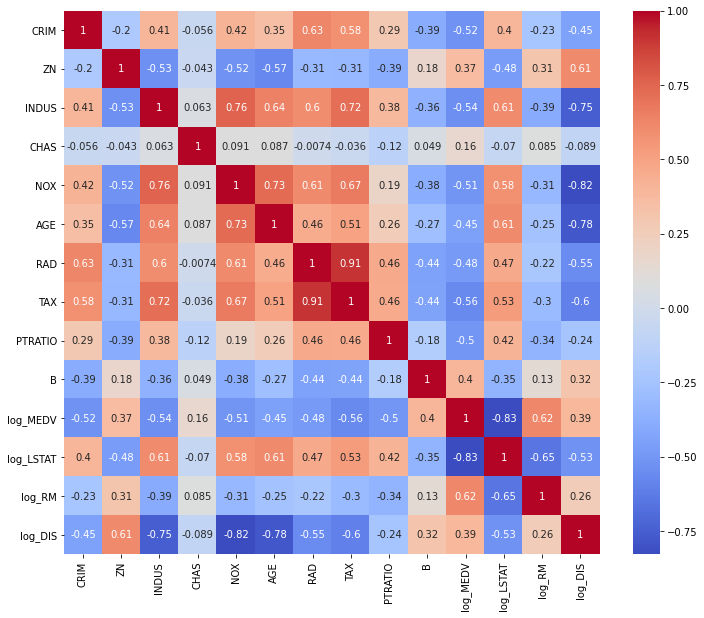

In [14]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(pd.concat([df,log_df],axis=1).drop(['MEDV','RM','LSTAT','DIS'],axis=1).corr(),annot=True,cmap='coolwarm')

In [15]:
df=df.drop(['CHAS'],axis=1)
df=pd.concat([df,log_df],axis=1).drop(['MEDV','RM','LSTAT','DIS'],axis=1)

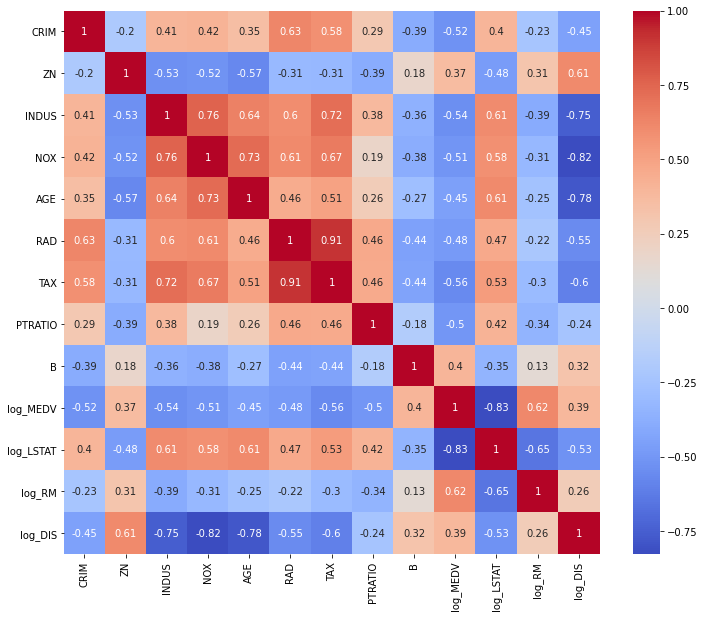

In [16]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [17]:
bin_df=pd.DataFrame([])

labels=['First','Second','Third','Fourth']

bin_df['MEDV_bin']=pd.qcut(df['log_MEDV'],4,labels=labels)

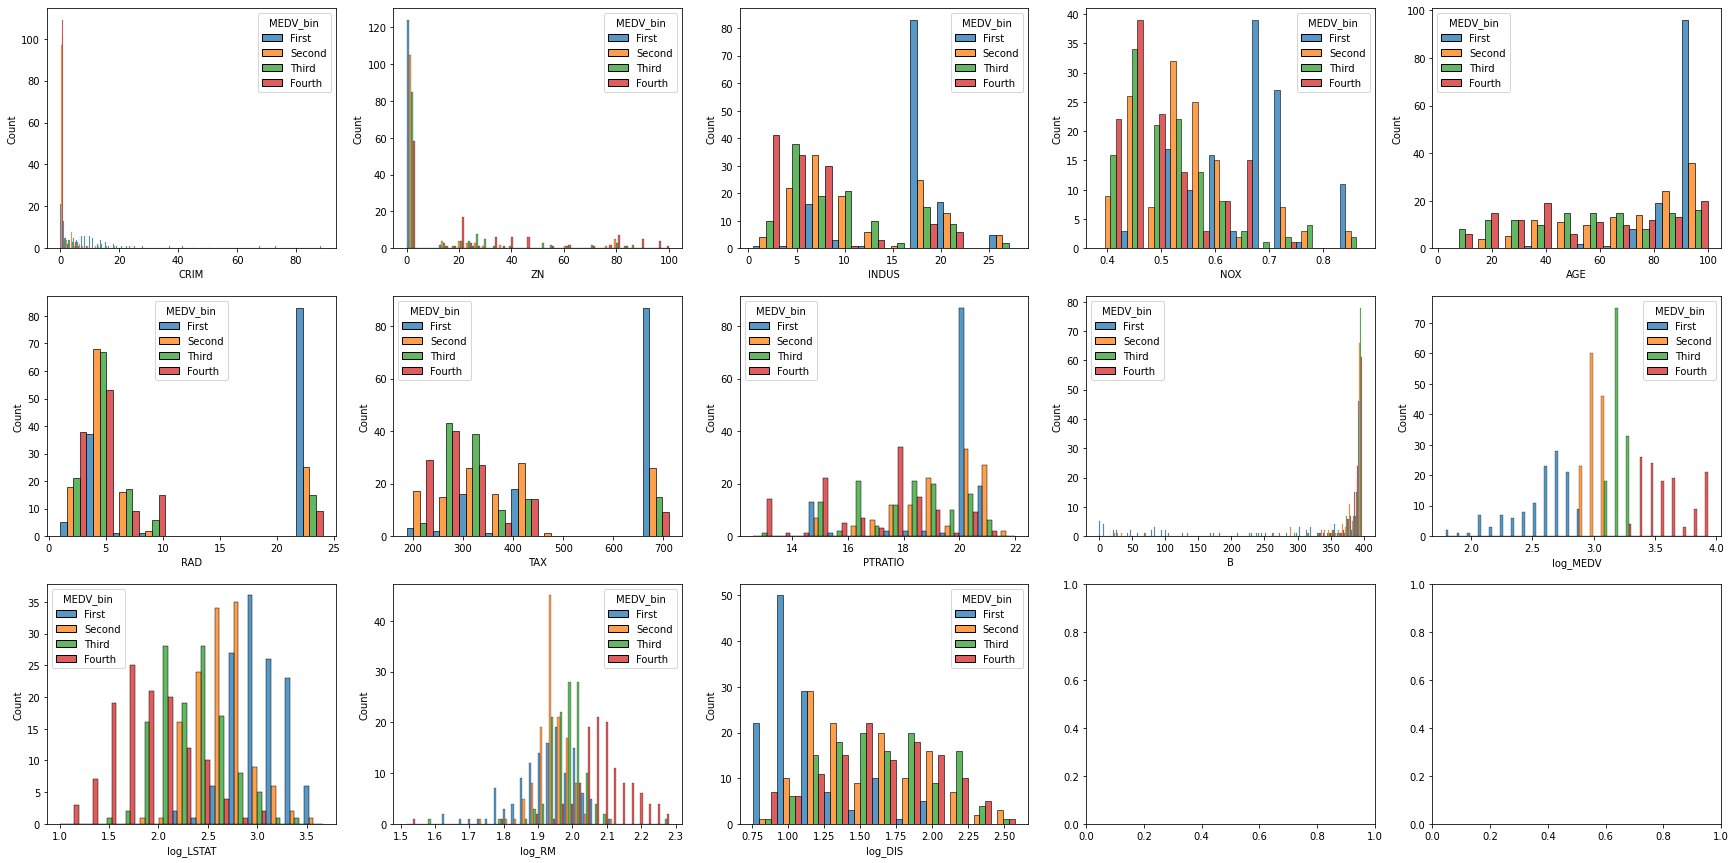

In [18]:
ncols=5
nrows=(len(df.columns)+(len(df.columns)%ncols))//ncols

nrows=(len(df.columns)+(ncols))//ncols
figsize=((30,5*nrows))
figs,axs=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)

for i,col in enumerate(df.columns):
  sns.histplot(x=df[col],hue=bin_df['MEDV_bin'],ax=axs[i//ncols][i%ncols],multiple='dodge')

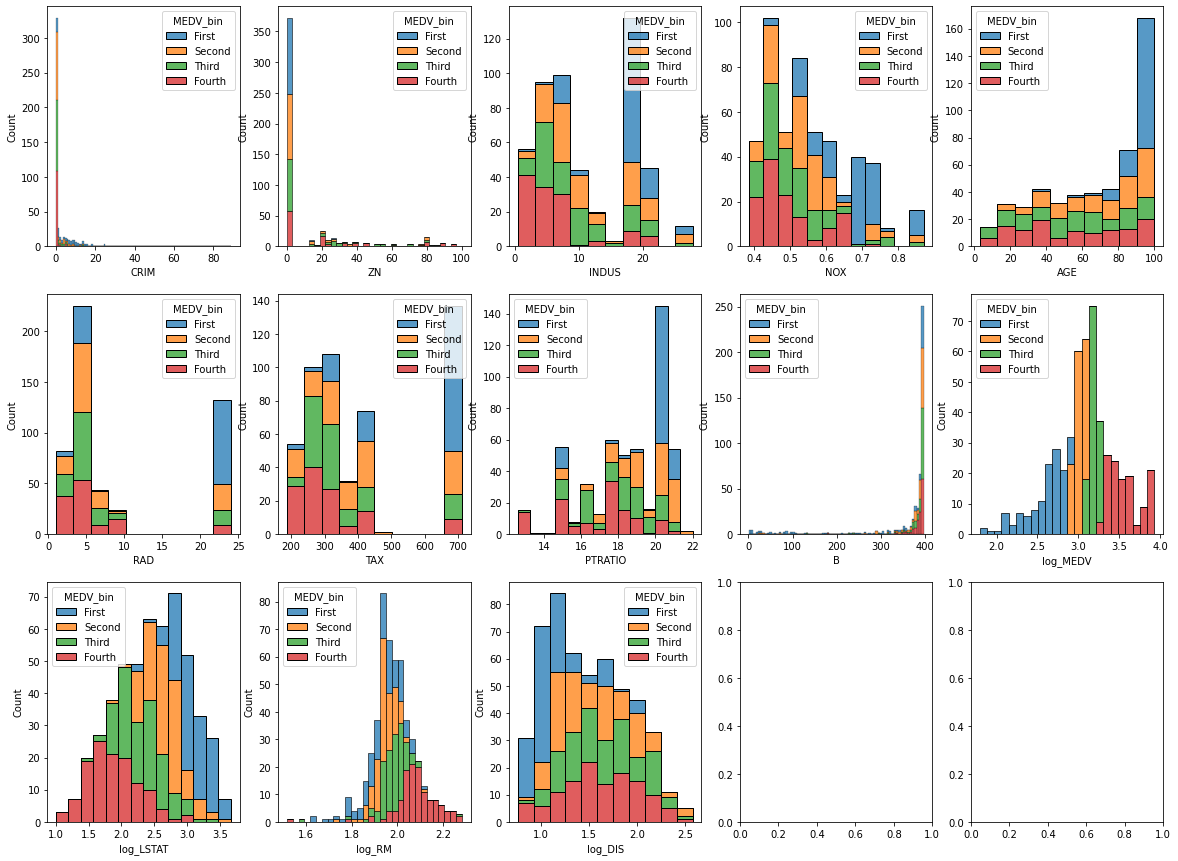

In [19]:
ncols=5
nrows=(len(df.columns)+(len(df.columns)%ncols))//ncols
figsize=((20,5*nrows))
figs,axs=plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)

for i,col in enumerate(df.columns):
  sns.histplot(x=df[col],hue=bin_df['MEDV_bin'],multiple='stack',ax=axs[i//ncols][i%ncols])

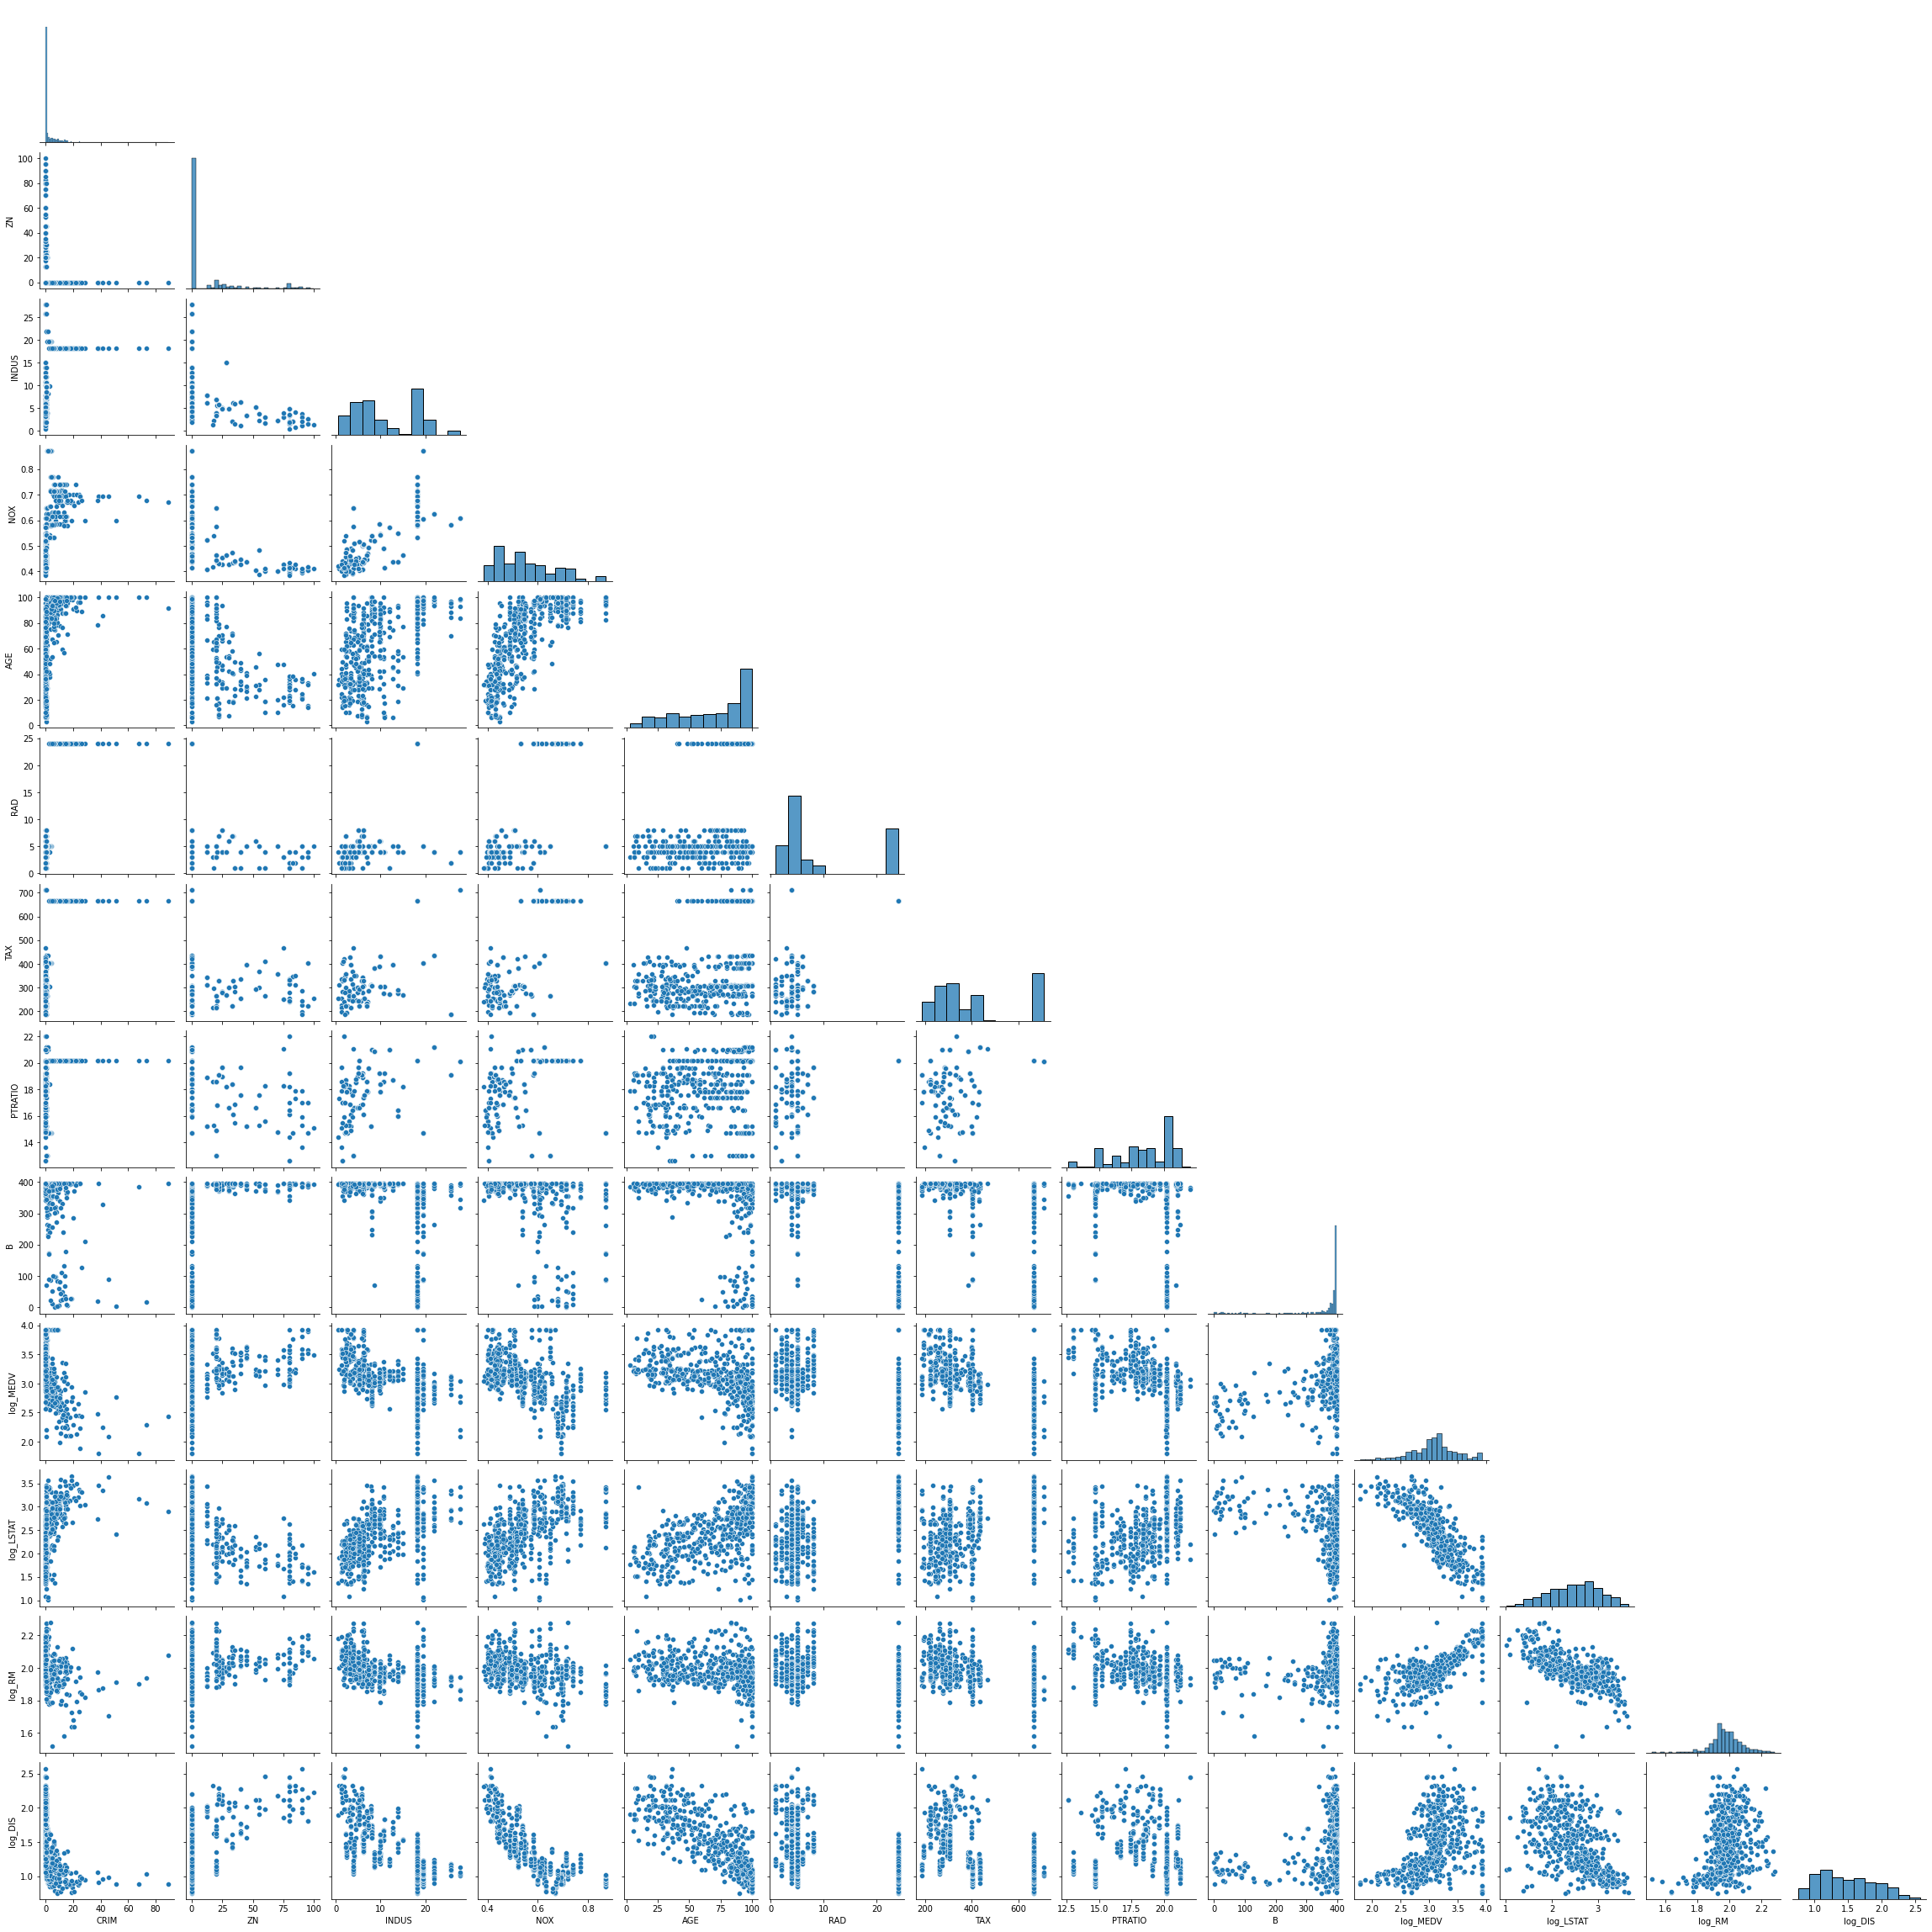

In [20]:
sns.pairplot(df,corner=True)

In [25]:
bin_df['LSTAT_bin']=pd.qcut(df['log_LSTAT'],4,labels=labels)
bin_df['RM_bin']=pd.qcut(df['log_RM'],4,labels=labels)
bin_df['RM_bin']=pd.qcut(df['log_RM'],4,labels=labels)

In [26]:
tmp_df=pd.concat([df,bin_df],axis=1)

In [27]:
tmp_df.groupby(['LSTAT_bin','RM_bin'])['log_MEDV'].mean()

LSTAT_bin  RM_bin
First      First     3.931826
           Second    3.173301
           Third     3.262788
           Fourth    3.592379
Second     First     3.101722
           Second    3.100160
           Third     3.198353
           Fourth    3.435719
Third      First     2.998261
           Second    2.996186
           Third     2.975165
           Fourth    3.096183
Fourth     First     2.621351
           Second    2.762897
           Third     2.625133
           Fourth    2.668985
Name: log_MEDV, dtype: float64